# Stack Overflow Survey Analysis
This notebook analyzes data from the 2022 Stack Overflow Developer Survey.

**Some topics covered are:**
- Do hobby programmers make more money?
- Which programming languages earn the biggest salaries?
- How does education affect the programmer's salary?
- How often do programmers visit Stack Overflow?

In [29]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
data = pd.read_csv("survey_results_public.csv")

## Utils
In this section are all the helper functions used throughout the notebook.

In [31]:
def income_bar_chart(column_name: str, labels: list[str] = None, sort: bool = False) -> Series:
    """
    Create a bar chart of median incomes of respondent groups.

    Args:
        column_name (str): Name of the column by which the respondents will be grouped with.
        labels (list[str], optional): Labels for the bars.
        sort (bool, optional): If true, sort the incomes in ascending order before showing the chart.

    Returns:
        Series: Groups with calculated median income.
    """

    # create a group for the categories
    group = data.groupby(column_name)

    # get the median income for each group
    group_income = group["ConvertedCompYearly"].median()

    # sort the bars by income in ascending order if necessary
    if sort:
        group_income.sort_values(inplace=True)

    # plot the results on a bar chart
    ax = group_income.plot.bar()
    ax.set_xlabel("")

    # add optional labels
    if labels is not None:
        ax.set_xticklabels(labels)

    return group_income

In [32]:
def print_comparison_stats(label1: str, label2: str, income1: float, income2: float) -> None:
    """
    Print a financial comparison of two groups/individuals.

    Args:
        label1 (str): Name of the first entity.
        label2 (str): Name of the second entity.
        income1 (str): Income of the first entity.
        income2 (str): Income of the second entity.
    """

    print(f"{label1}: {income1}$ per year")
    print(f"{label2}: {income2}$ per year")
    print(f"Income difference: {abs(income1 - income2)}$")

## Do hobby programmers make more money?
We will compare median annual salaries of hobby programmers and their counterparts, to see which one would make more money, or if there even is a difference.

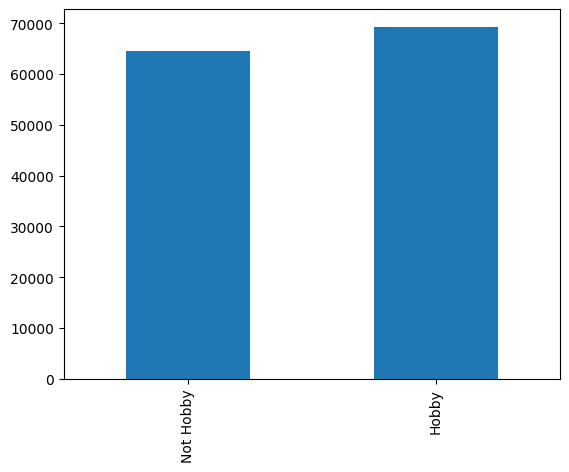

In [33]:
# create a new column for distinguishing hobby and non-hobby programmers
data["Hobby"] = data["CodingActivities"].str.contains("Hobby")

# plot the results on a bar chart
hobby_group_incomes = income_bar_chart("Hobby", ["Not Hobby", "Hobby"])

In [34]:
print_comparison_stats(
    "Hobby income",
    "Non-Hobby income",
    hobby_group_incomes[True],
    hobby_group_incomes[False]
)

Hobby income: 69318.0$ per year
Non-Hobby income: 64486.0$ per year
Income difference: 4832.0$


## Does contributing to open source matter in employment?
We will compare the median annual salaries of open source contributors to the median annual salaries of non-contributors to see, if they are more likely to get hired/earn a higher salary.

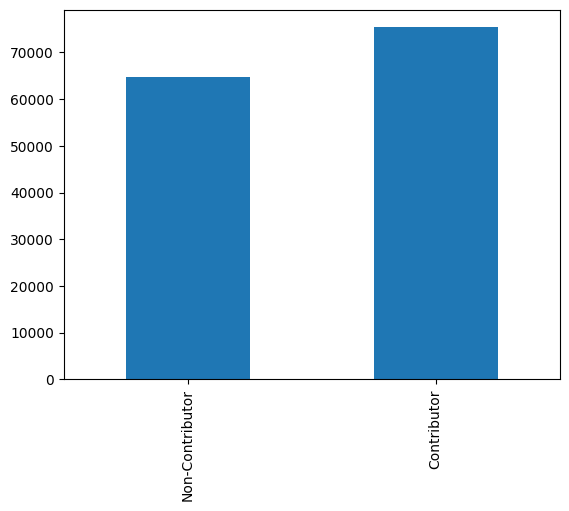

In [35]:
# create a new column for distinguishing open-source contributors and non-contributors
data["OpenSourceContributor"] = data["CodingActivities"].str.contains("Contribute to open-source projects")

# plot the results on a bar chart
open_source_group_incomes = income_bar_chart("OpenSourceContributor", ["Non-Contributor", "Contributor"])

In [36]:
print_comparison_stats(
    "Contributor income",
    "Non-Contributor income",
    open_source_group_incomes[True],
    open_source_group_incomes[False]
)

Contributor income: 75400.0$ per year
Non-Contributor income: 64810.0$ per year
Income difference: 10590.0$


## Which programming languages earn the biggest salaries?
In this section, we will rank programming languages by their median salary to figure out which ones pay the most. In order to do this measurement, we will add the respondents annual pay to each language he knows. Thus giving us a rough estimate of the language's value.

Dart: 43724.0$ per year
PHP: 50496.0$ per year
MATLAB: 57588.0$ per year
VBA: 62328.0$ per year
Delphi: 63984.0$ per year
HTML/CSS: 63984.0$ per year
SAS: 64243.0$ per year
JavaScript: 65580.0$ per year
Java: 65591.0$ per year
C: 66948.0$ per year
C++: 68000.0$ per year
SQL: 69108.0$ per year
Kotlin: 69318.0$ per year
C#: 69516.0$ per year
TypeScript: 70276.0$ per year
Solidity: 70368.0$ per year
Python: 71105.0$ per year
Assembly: 75000.0$ per year
COBOL: 75592.0$ per year
APL: 75931.5$ per year
Julia: 77966.0$ per year
PowerShell: 78084.0$ per year
Swift: 78467.5$ per year
Lua: 79568.0$ per year
Fortran: 80000.0$ per year
Haskell: 80250.0$ per year
Bash/Shell: 81666.0$ per year
Objective-C: 83165.0$ per year
R: 84000.0$ per year
Crystal: 84690.5$ per year
Groovy: 85320.0$ per year
OCaml: 86948.0$ per year
Rust: 87047.0$ per year
Go: 89204.0$ per year
Perl: 90073.0$ per year
Scala: 92780.0$ per year
Elixir: 92959.0$ per year
Ruby: 93000.0$ per year
LISP: 95000.0$ per year
F#: 95526.0$

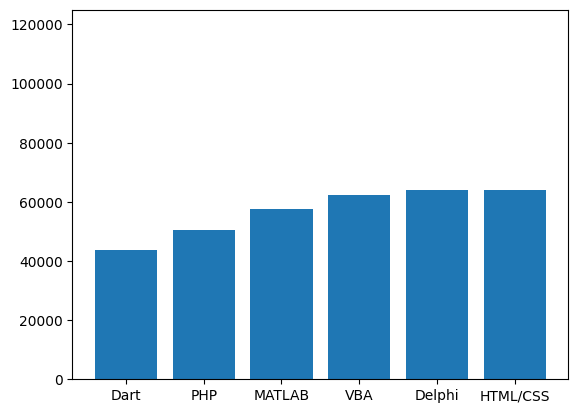

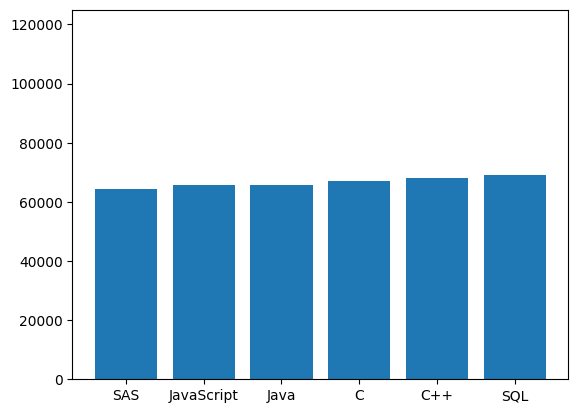

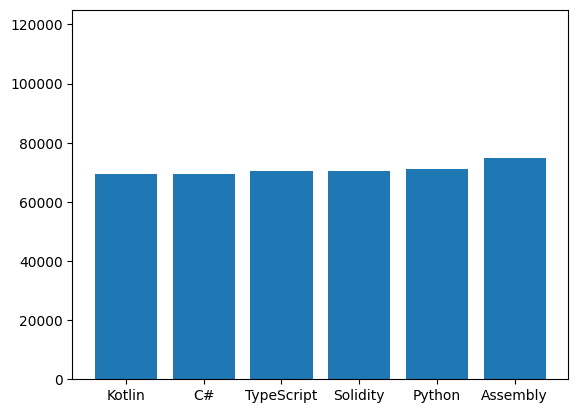

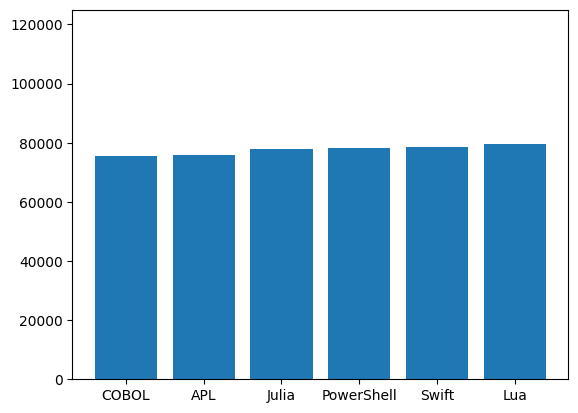

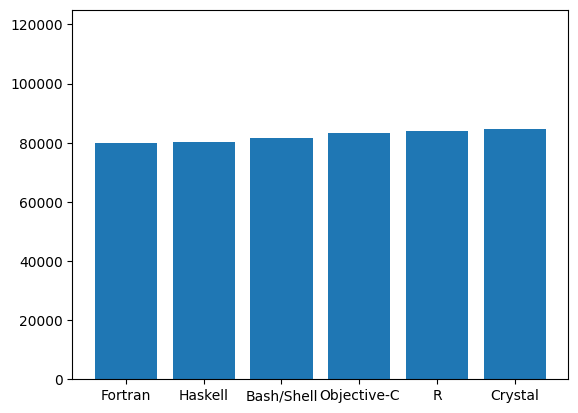

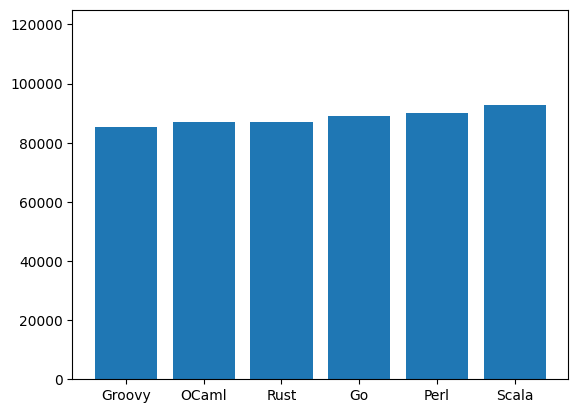

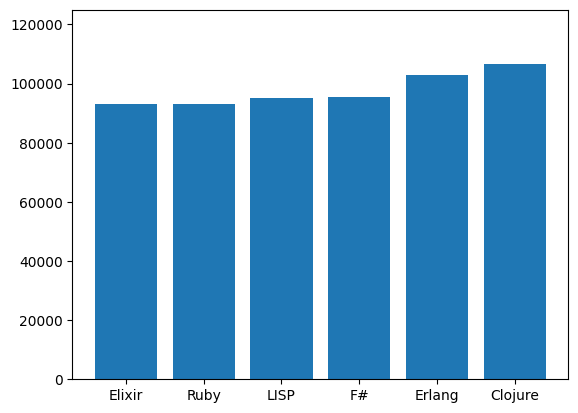

In [37]:
# load a list of all possible languages from a file
with open("programming_languages.txt", "r") as f:
    languages = f.read().split("\n")

# get a data frame where all rows have the "LanguageHaveWorkedWith" column filled in (aka not NaN)
not_nan_data = data[data["LanguageHaveWorkedWith"].notna()]

# create a list of filters for each language
language_filts = [not_nan_data["LanguageHaveWorkedWith"].str.contains(lang, regex=False) for lang in languages]

# compute the median income for each language using the filters
language_medians = [not_nan_data.loc[filt, "ConvertedCompYearly"].median() for filt in language_filts]

# sort the languages by the median income from highest to lowest
combined = list(zip(languages, language_medians))
combined.sort(key=lambda x: x[1])

# separate the sorted combined list
languages = [item[0] for item in combined]
language_medians = [item[1] for item in combined]

# print the statistic
for lang, median_pay in combined:
    print(f"{lang}: {median_pay}$ per year")

# separate the data into chunks so that they can be viewed more easily
chunks = []
chunk_size = 6

for i in range(0, len(languages), chunk_size):
    chunks.append(
        (languages[i:i + chunk_size], language_medians[i:i + chunk_size])
    )

# display each chunk as a separate chart
for language_chunk, median_chunk in chunks:
    _, ax = plt.subplots()
    ax.bar(language_chunk, median_chunk)
    ax.set_ylim(0, 125000)
    plt.show()

## How does education affect the programmer's salary?
We will compare annual median income of different education groups to see the effect of education on their work.

Professional degree : 44793.0$ per year
Secondary school : 51189.0$ per year
Something else: 53322.0$ per year
Primary/elementary school: 57672.0$ per year
Some college/university study without earning a degree: 63984.0$ per year
Associate degree : 69102.0$ per year
Bachelor’s degree : 69318.0$ per year
Master’s degree : 70000.0$ per year
Other doctoral degree : 85513.0$ per year


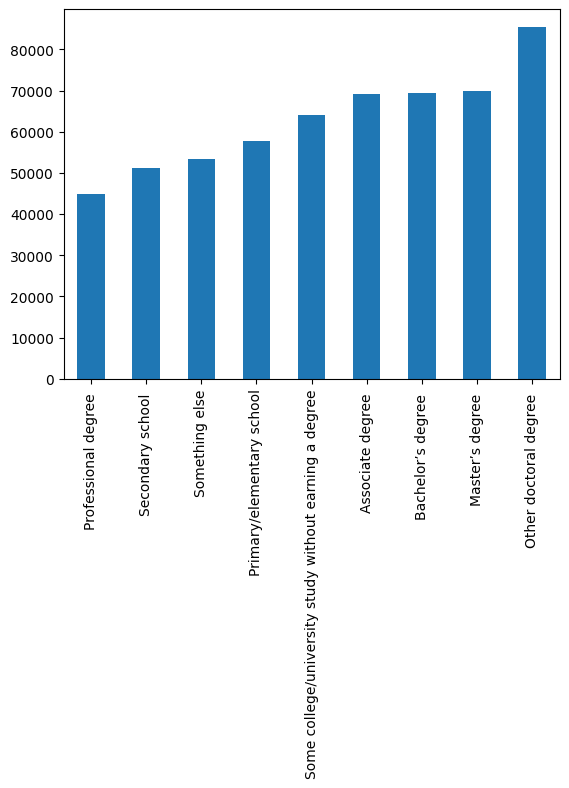

In [38]:
# simplify the option names by removing parentheses
# example: Associate degree (A.A., A.S., etc.) -> Associate degree
data["SimplifiedEdLevel"] = data["EdLevel"].str.replace(r'\([^)]*\)', "", regex=True)

education_group_incomes = income_bar_chart("SimplifiedEdLevel", sort=True)

# print statistic
for group_name, group_income in zip(education_group_incomes.index, education_group_incomes.values):
    print(f"{group_name}: {group_income}$ per year")

/var/folders/09/b48rt2p55q3_4qnjgwf_7cn00000gn/T/ipykernel_64119/2701476097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nan_data["YearsCode"] = data["YearsCode"].str.replace("Less than 1 year", "0")


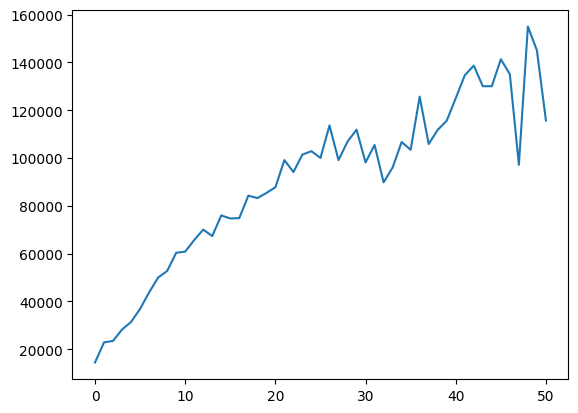

In [39]:
# create a new dataframe with no NaN values
not_nan_data = data[data["YearsCode"].notna()]

# replace "Less than 1 year" with 0 so that it can be displayed on the chart
not_nan_data["YearsCode"] = data["YearsCode"].str.replace("Less than 1 year", "0")

# filter out "More than 50 years" values as they can't be displayed on the chart
fifty_years_filt = not_nan_data["YearsCode"] == "More than 50 years"
not_nan_data = not_nan_data[~fifty_years_filt]

# convert the experience column to numeric values
not_nan_data["YearsCode"] = pd.to_numeric(not_nan_data["YearsCode"])

# group people by their experience
experience_group = not_nan_data.groupby("YearsCode")

# calculate the median for each year group
experience_median = experience_group["ConvertedCompYearly"].median()

# make plot of the experience to income
plt.plot(experience_median.index, experience_median.values)

## How often do programmers visit Stack Overflow?

Text(0, 0.5, '')

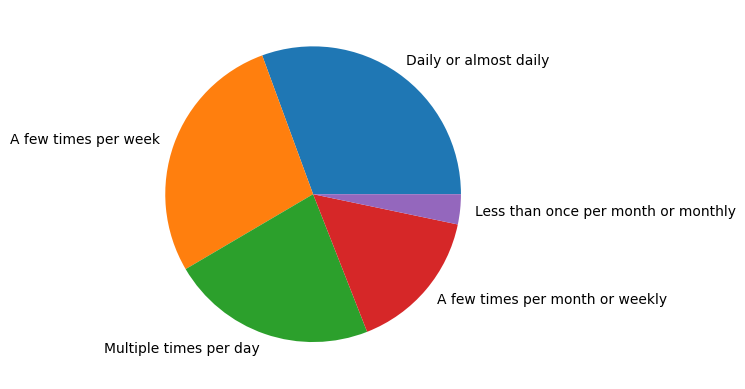

In [40]:
ax = data["SOVisitFreq"].value_counts().plot.pie()
ax.set_ylabel("")